# QuantumSim - Bell States
Author: Nico Kuijpers<br>
Date: May 11, 2024

In this Jupyter notebook quantum circuits for the four Bell states are created using QuantumSim.

In [1]:
from quantumsim import *

## Circuits for the Bell states
The four Bell states are states that can be obtained with two maximally entangled qubits. 
They were discovered by John S. Bell in the 1960s and are used in quantum information theory.

Each Bell state represents a superposition of two qubits.
They are defined as follows:

1. $|\Phi^+\rangle$ (Phi plus state):<br>
$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

2. $|\Phi^-\rangle$ (Phi minus state):<br>
$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

3. $|\Psi^+\rangle$ (Psi plus state):<br>
$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

4. $|\Psi^-\rangle$ (Psi minus state):<br>
$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

Below, four quantum circuits of two qubits are created. Each of these circuits implements one of the four Bell states.

In [2]:
circ_bell_phi_plus = Circuit(2)
circ_bell_phi_plus.hadamard(0)
circ_bell_phi_plus.cnot(0,1)

circ_bell_phi_minus = Circuit(2)
circ_bell_phi_minus.pauli_x(0)
circ_bell_phi_minus.hadamard(0)
circ_bell_phi_minus.cnot(0,1)

circ_bell_psi_plus = Circuit(2)
circ_bell_psi_plus.pauli_x(1)
circ_bell_psi_plus.hadamard(0)
circ_bell_psi_plus.cnot(0,1)

circ_bell_psi_minus = Circuit(2)
circ_bell_psi_minus.hadamard(0)
circ_bell_psi_minus.pauli_x(1)
circ_bell_psi_minus.pauli_z(0)
circ_bell_psi_minus.pauli_z(1)
circ_bell_psi_minus.cnot(0,1)


Next, the four circuits are executed $1000$ times and histograms of the resulting classical states are created.

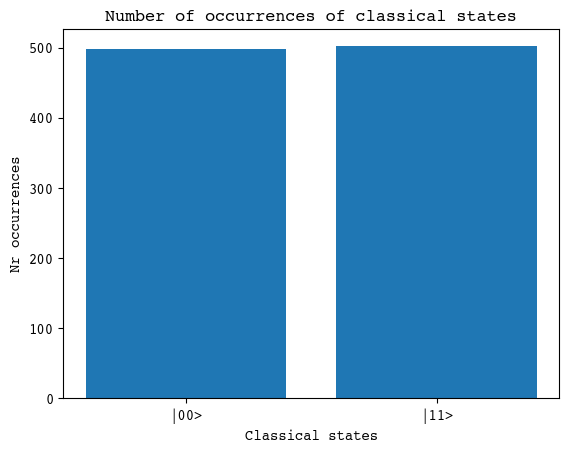

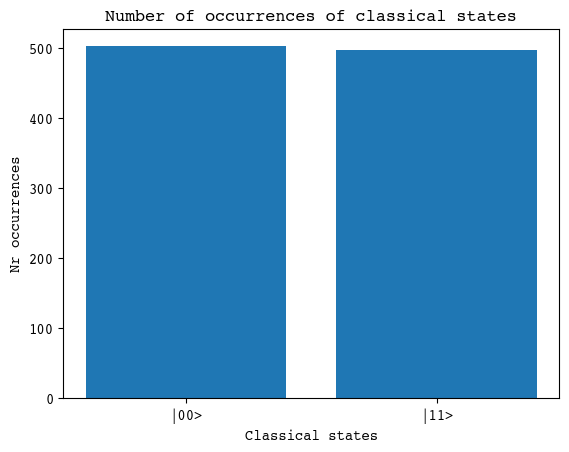

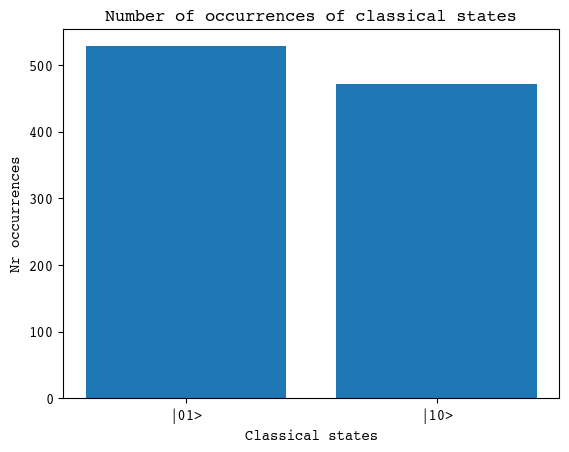

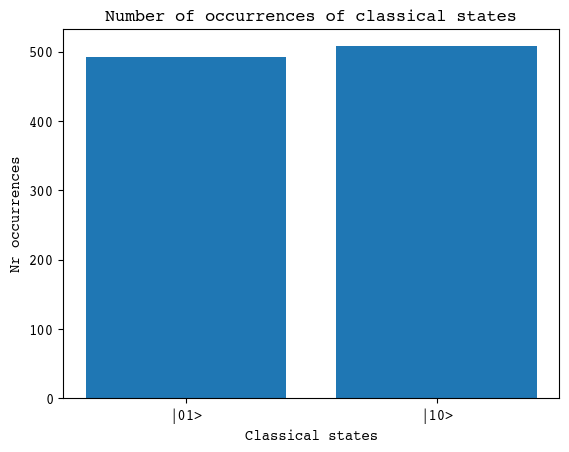

In [3]:
result_bell_phi_plus = QuantumUtil.run_circuit(circ_bell_phi_plus)
QuantumUtil.histogram_of_classical_states(result_bell_phi_plus)
result_bell_phi_minus = QuantumUtil.run_circuit(circ_bell_phi_minus)
QuantumUtil.histogram_of_classical_states(result_bell_phi_minus)
result_bell_psi_plus = QuantumUtil.run_circuit(circ_bell_psi_plus)
QuantumUtil.histogram_of_classical_states(result_bell_psi_plus)
result_bell_psi_minus = QuantumUtil.run_circuit(circ_bell_psi_minus)
QuantumUtil.histogram_of_classical_states(result_bell_psi_minus)

The fourth circuit is executed one more time. This time, the combined operations, intermediate quantum states, and the resulting classical state are printed.

In [4]:
circ_bell_psi_minus.execute(True)
circ_bell_psi_minus.measure(True)

Initial quantum state
|00> : (1+0j)
|01> : 0j
|10> : 0j
|11> : 0j
Hadamard on qubit 0
[[ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j -0.70710678-0.j  0.        -0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        -0.j -0.70710678-0.j]]
Current quantum state
|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : (0.7071067811865475+0j)
|11> : 0j
Pauli X on qubit 1
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
Current quantum state
|00> : 0j
|01> : (0.7071067811865475+0j)
|10> : 0j
|11> : (0.7071067811865475+0j)
Pauli Z on qubit 0
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]]
Current quantum state
|00> : 0j
|01> : (0.7071067811865475+0j)
|10> : 0j
|11> : (-0.7071067811865475+0j)
Pauli Z on qubit 1
[[ 1.+0.j

Below the descriptions of each operation of the circuit are printed using method *print_circuit()* of class *Circuit*.

In [5]:
circ_bell_psi_minus.print_circuit()

Hadamard on qubit 0
Pauli X on qubit 1
Pauli Z on qubit 0
Pauli Z on qubit 1
CNOT with control qubit 0 and target qubit 1


Below the gates for each operation are printed using method *print_gates()* of class *Circuit*.

In [6]:
circ_bell_psi_minus.print_gates()

H.
.X
Z.
.Z
*X


Below, the probabilities corresonding to all intermediate quantum states are shown.

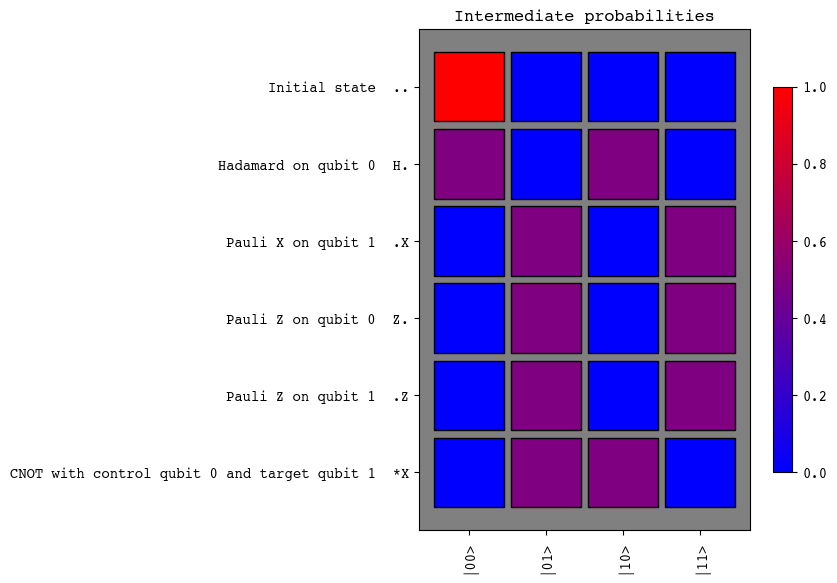

In [7]:
QuantumUtil.show_all_probabilities(circ_bell_psi_minus)

Below, all intermediate quantum states are shown.

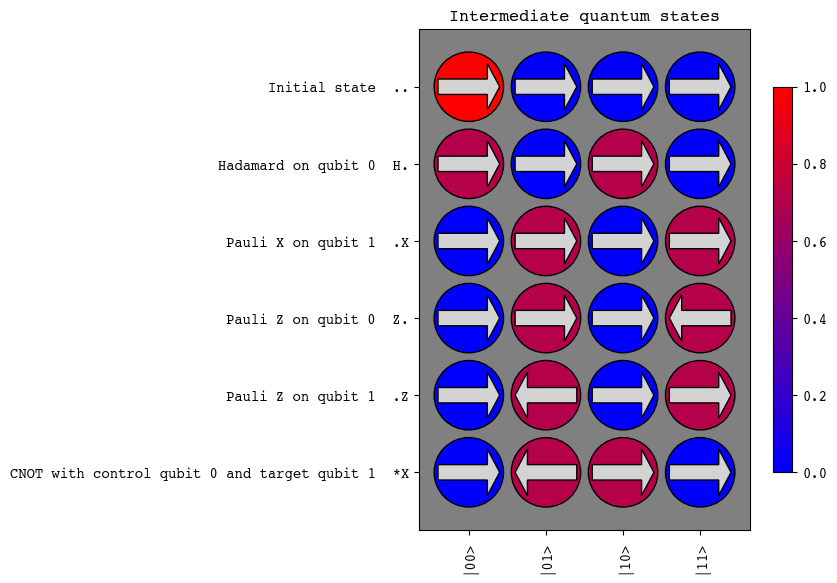

In [8]:
QuantumUtil.show_all_intermediate_states(circ_bell_psi_minus)